<a href="https://colab.research.google.com/github/Manishachermadurai/MachineLearning/blob/main/Model_with_MRI_Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#connecting google drive for accessing dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import os

In [3]:
!pip install keras
!pip install tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
train_path="/content/gdrive/My Drive/ParkinsonDatasetJpg/data/training"
test_path="/content/gdrive/My Drive/ParkinsonDatasetJpg/data/testing"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

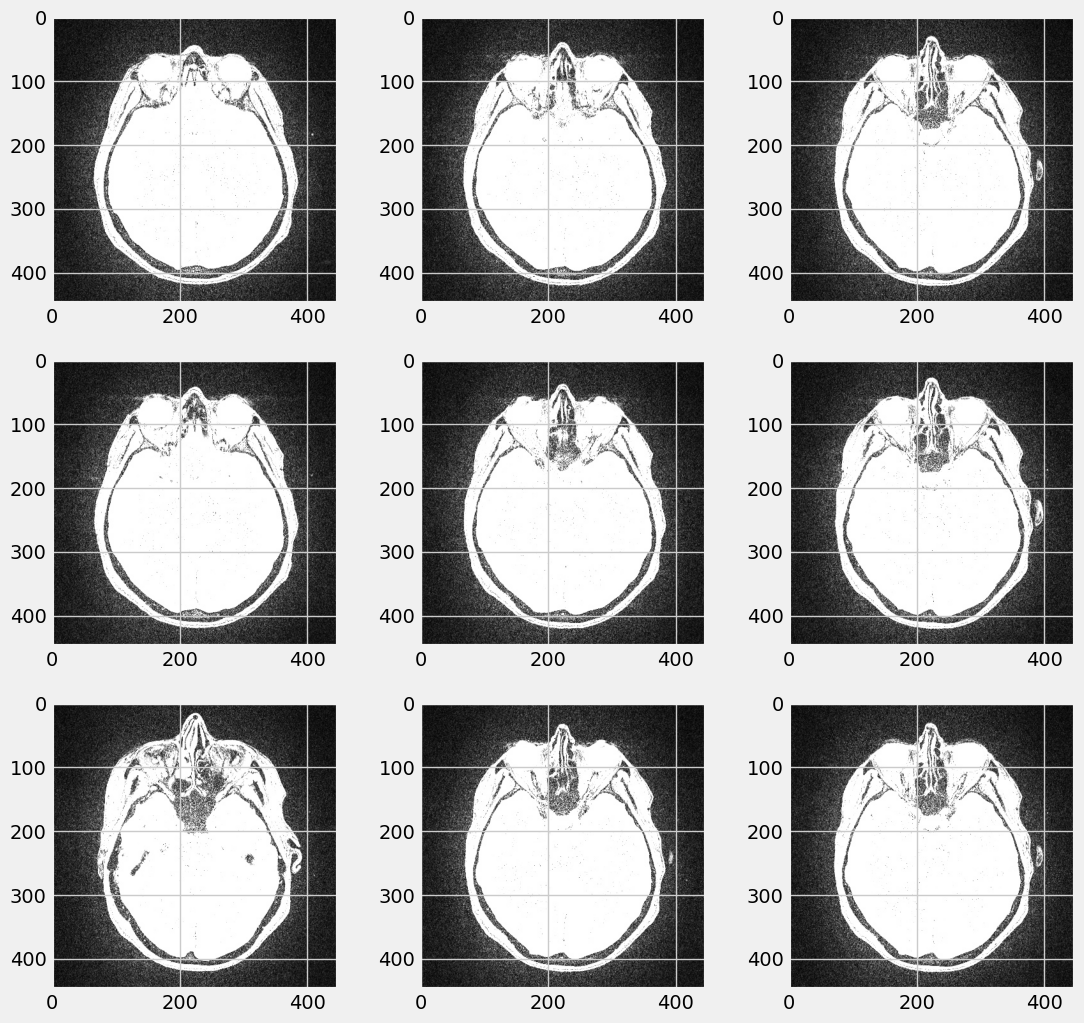

In [5]:
fig = plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/ParkinsonDatasetJpg/data/training/data/"+
                  os.listdir("/content/gdrive/My Drive/ParkinsonDatasetJpg/data/training/data")[i])
    plt.imshow(img)
fig.canvas.manager.set_window_title('Training images')
plt.show() 

In [6]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [7]:
#model building
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
Hybrid = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
#training model
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True,
                                  featurewise_center=False, 
                                  samplewise_center=False,  
                                  featurewise_std_normalization=False,  
                                  samplewise_std_normalization=False,  
                                  zca_whitening=False,  
                                  rotation_range=90,                                   
                                  width_shift_range=0.1,  
                                  height_shift_range=0.1,                                    
                                  vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_generator = train_datagen.flow_from_directory('/content/gdrive/My Drive/ParkinsonDatasetJpg/data/training',
                                                   target_size = (224,224),
                                                   batch_size = 16,
                                                   class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/content/gdrive/My Drive/ParkinsonDatasetJpg/data/testing',
                                                   target_size = (224,224),
                                                   batch_size = 16,
                                                   class_mode = 'binary')

Found 2141 images belonging to 1 classes.
Found 557 images belonging to 1 classes.


In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
# from keras.optimizers import SGD
from keras.optimizers import Adam
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [15]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model100.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [16]:
history = model.fit_generator(
        train_generator,validation_data=test_generator,
        steps_per_epoch=len(train_generator),
        epochs=5,
        validation_steps=len(test_generator),
        verbose=1,
        callbacks=[mc,es])

Epoch 1/5
134/134 [==============================] - 3181s 24s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
134/134 [==============================] - 3208s 24s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
134/134 [==============================] - 3186s 24s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
134/134 [==============================] - 3148s 24s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
134/134 [==============================] - 3195s 24s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [17]:
model.evaluate_generator(test_generator)

[0.0, 1.0]

In [18]:
#accuracy of the model
List = history.history['accuracy']
print("Accuracy : ",List[len(List)-1])

Accuracy :  1.0


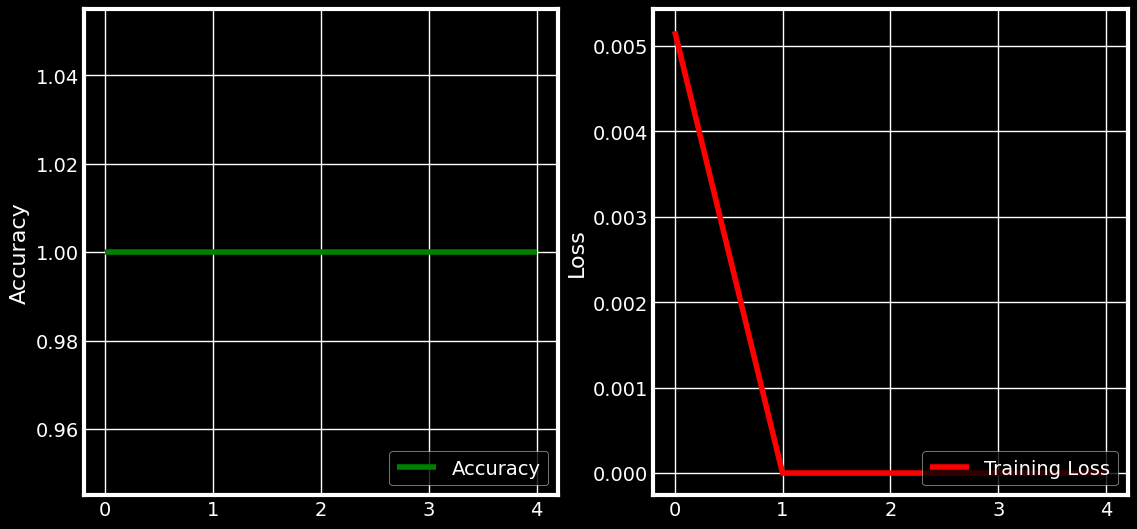

In [19]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Accuracy', color = 'green')
plt.legend(loc='lower right')
fig.canvas.manager.set_window_title('Accuracy & Training Loss')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()

In [20]:
model.load_weights("/content/gdrive/My Drive/best_model100.h5")